# Self-Supervised 

Objectives 

- SimCLR model

- Try different augmentations see , impact the learned representations

- Use SelfSupervisedEmbedding class from the embedding module to train
  a model and obtain embeddings


## Import Pacakages





In [1]:
pip install pytorch_lightning

     |████████████████████████████████| 526 kB 7.1 MB/s 
     |████████████████████████████████| 396 kB 50.1 MB/s 
     |████████████████████████████████| 829 kB 46.8 MB/s 
     |████████████████████████████████| 133 kB 62.6 MB/s 
     |████████████████████████████████| 596 kB 48.9 MB/s 
     |████████████████████████████████| 1.1 MB 45.9 MB/s 
     |████████████████████████████████| 271 kB 65.8 MB/s 
     |████████████████████████████████| 160 kB 58.8 MB/s 
     |████████████████████████████████| 192 kB 57.9 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=77b859078f332b17131ebd78fdee71bf331eec857a76861693e5198f2d807042
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: future
    Found exis

In [2]:
pip install lightly

     |████████████████████████████████| 322 kB 10.5 MB/s 
     |████████████████████████████████| 145 kB 54.2 MB/s 
     |████████████████████████████████| 74 kB 3.5 MB/s 
     |████████████████████████████████| 112 kB 55.1 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=964aa99f5f7aa59c9f71228d1a7dac878352392f0099fce24aed6d3144a0521d
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime


In [3]:
import os
import glob
import torch
import torch.nn as nn
import torchvision
import pytorch_lightning as pl
import lightly
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from PIL import Image
import numpy as np
import pandas as pd 
%matplotlib inline

## Explore LIGHTLY 

In [4]:
help(lightly)

Help on package lightly:

NAME
    lightly - Lightly is a computer vision framework for self-supervised learning.

DESCRIPTION
    With Lightly you can train deep learning models using
    self-supervision. This means, that you don't require
    any labels to train a model. Lightly has been built
    to help you understand and work with large unlabeled datasets.
    It is built on top of PyTorch and therefore fully compatible 
    with other frameworks such as Fast.ai.
    
    The framework is structured into the following modules:
    
    - **api**: 
    
      The lightly.api module handles communication with the Lightly web-app.
    
    - **cli**:
    
      The lightly.cli module provides a command-line interface for training 
      self-supervised models and embedding images. Furthermore, the command-line
      tool can be used to upload and download images from/to the Lightly web-app.
    
    - **core**:
    
      The lightly.core module offers one-liners for simple self-sup

In [5]:
dir(lightly.models.SimCLR)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_call_impl',
 '_get_backward_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_maybe_warn_non_full_backward_hook',
 '_named_members',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_version',
 'add_module',
 'apply',
 'bfloat16',
 'buffers',
 'children',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'float',
 'forward',
 'get_buffer',
 'get_extra_state',
 'get_parameter',
 'get_submodule',
 'half',
 'load_

In [6]:
vars(lightly.models.SimCLR)

mappingproxy({'__doc__': 'Implementation of the SimCLR[0] architecture\n\n    Recommended loss: :py:class:`lightly.loss.ntx_ent_loss.NTXentLoss`\n\n    [0] SimCLR, 2020, https://arxiv.org/abs/2002.05709\n\n    Attributes:\n        backbone:\n            Backbone model to extract features from images.\n        num_ftrs:\n            Dimension of the embedding (before the projection head).\n        out_dim:\n            Dimension of the output (after the projection head).\n\n    ',
              '__init__': <function lightly.models.simclr.SimCLR.__init__>,
              '__module__': 'lightly.models.simclr',
              'forward': <function lightly.models.simclr.SimCLR.forward>})

## Configuration

We set some configuration parameters for our experiment.
Feel free to change them and analyze the effect.

The default configuration with a batch size of 256 and input resolution of 128
requires 6GB of GPU memory.



In [7]:
num_workers = 2 #8
batch_size = 20
seed = 1
max_epochs = 2
input_size = 128
num_ftrs = 32

Let's set the seed for our experiments



In [8]:
pl.seed_everything(seed)

Global seed set to 1


1

## Import Data 



In [ ]:
#files.upload()

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
os.chdir("/content/drive/MyDrive/SemSeg2/Experiments/CityScapes")

m= pd.read_csv(r'CityScapes_MetaData.csv')
m.head(10)

,Unnamed: 0,ImageName,RawImage,Mask,ColourMask
0,0,aachen_000000_000019,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...
1,1,aachen_000001_000019,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...
2,2,aachen_000002_000019,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...
3,3,aachen_000003_000019,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...
4,4,aachen_000004_000019,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...
5,5,aachen_000005_000019,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...
6,6,aachen_000006_000019,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...
7,7,aachen_000007_000019,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...
8,8,aachen_000008_000019,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...
9,9,aachen_000009_000019,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...,/content/drive/MyDrive/SemSeg2/data/gtFine/tra...


In [11]:
import os
os.chdir("/content/drive/MyDrive/SemSeg2/data")

In [12]:
path_to_data ="leftImg8bit/train/"

In [13]:
#Not Needed if we use the metadataFile 
import os

path_to_data ="leftImg8bit/train/"
#we shall store all the file names in this list
filelist = []

for root, dirs, files in os.walk(path_to_data):
	for file in files:
        #append the file name to the list
		filelist.append(os.path.join(root,file))

#print all the file names
for name in filelist:
    print(name)

leftImg8bit/train/cologne/cologne_000003_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000005_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000006_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000011_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000012_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000000_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000008_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000009_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000010_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000007_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000001_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000004_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000002_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000015_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000046_000019_leftImg8bit.png
leftImg8bit/train/cologne/cologne_000036

In [14]:
import pandas as pd
#make list of Actual labels 
#labels=pd.DataFrame(filelist)
labels = m['RawImage']
labels

0       /content/drive/MyDrive/SemSeg2/data/leftImg8bi...
1       /content/drive/MyDrive/SemSeg2/data/leftImg8bi...
2       /content/drive/MyDrive/SemSeg2/data/leftImg8bi...
3       /content/drive/MyDrive/SemSeg2/data/leftImg8bi...
4       /content/drive/MyDrive/SemSeg2/data/leftImg8bi...
                              ...                        
2970    /content/drive/MyDrive/SemSeg2/data/leftImg8bi...
2971    /content/drive/MyDrive/SemSeg2/data/leftImg8bi...
2972    /content/drive/MyDrive/SemSeg2/data/leftImg8bi...
2973    /content/drive/MyDrive/SemSeg2/data/leftImg8bi...
2974    /content/drive/MyDrive/SemSeg2/data/leftImg8bi...
Name: RawImage, Length: 2975, dtype: object

## Setup data augmentations and loaders

The images have  additional augmentations
such as vertical flip or random rotation (90 degrees). 
By adding these augmentations we learn our model invariance regarding the 
orientation 

You can learn more about the different augmentations and learned invariances
here: `lightly-advanced`.



In [15]:
collate_fn = lightly.data.SimCLRCollateFunction(
    input_size=input_size,
    vf_prob=0.5,
    rr_prob=0.5
)

# We create a torchvision transformation for embedding the dataset after 
# training
test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((input_size, input_size)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=lightly.data.collate.imagenet_normalize['mean'],
        std=lightly.data.collate.imagenet_normalize['std'],
    )
])

dataset_train_simclr = lightly.data.LightlyDataset(
    input_dir=path_to_data ##Data location 
)

dataset_test = lightly.data.LightlyDataset(
    input_dir=path_to_data,    ##Data location 
    transform=test_transforms
)

In [16]:
dataloader_train_simclr = torch.utils.data.DataLoader(
    dataset_train_simclr,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_fn,
    drop_last=True,
    num_workers=num_workers
)

dataloader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

## Create the SimCLR model
Create a ResNet backbone and remove the classification head



In [17]:

resnet = torchvision.models.resnet18()
last_conv_channels = list(resnet.children())[-1].in_features
backbone = nn.Sequential(
    *list(resnet.children())[:-1],
    nn.Conv2d(last_conv_channels, num_ftrs, 1),
)

# create the SimCLR model using the newly created backbone
model = lightly.models.SimCLR(backbone, num_ftrs=num_ftrs)

/usr/local/lib/python3.7/dist-packages/lightly/models/simclr.py:45: Warning: The high-level building block SimCLR will be deprecated in version 1.3.0. Use low-level building blocks instead. See https://docs.lightly.ai/lightly.models.html for more information
  PendingDeprecationWarning)


We now use the SelfSupervisedEmbedding class from the embedding module.
First, we create a criterion and an optimizer and then pass them together
with the model and the dataloader.



In [18]:
criterion = lightly.loss.NTXentLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

encoder = lightly.embedding.SelfSupervisedEmbedding(
    model,
    criterion,
    optimizer,
    dataloader_train_simclr
)

use a GPU if available



In [19]:
gpus = 1 if torch.cuda.is_available() else 0

## Train the Embedding
The encoder itself wraps a PyTorch-Lightning module. We can pass any 
lightning trainer parameter (e.g. gpus=, max_epochs=) to the train_embedding method.



In [20]:
encoder.train_embedding(gpus=gpus, 
                        progress_bar_refresh_rate=100,
                        max_epochs=max_epochs)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:91: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=100)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type       | Params
-----------------------------------------
0 | model     | SimCLR     | 11.2 M
1 | criterion | NTXentLoss | 0     
-----------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.793    Tota

Training: 0it [00:00, ?it/s]

Now, let's make sure we move the trained model to the gpu if we have one



In [21]:
device = 'cuda' if gpus==1 else 'cpu'
encoder = encoder.to(device)

We can use the .embed method to create an embedding of the dataset. The method
returns a list of embedding vectors as well as a list of filenames.



In [22]:
embeddings, _, fnames = encoder.embed(dataloader_test, device=device)
embeddings = normalize(embeddings)

Compute efficiency: 0.01: 100%|██████████| 149/149 [02:35<00:00,  1.04s/it]


In [23]:
len(embeddings)

2975

In [24]:
len(embeddings[0])

32

In [25]:
#Export 

df=pd.DataFrame(embeddings)

df=pd.merge(labels, df, left_index=True, right_index=True)
df

df.to_csv("leftImg8bit_embed_EXP_3.csv")




#END OF EMBEDDINGS 

In [ ]:
#read in embeddings 
import pandas as pd

embeddings = pd.read_csv('leftImg8bit_embed_10.csv')
embeddings


,Unnamed: 0,RawImage,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,0.049308,-0.030693,0.205533,-0.269664,0.214317,0.319585,-0.108447,-0.003788,0.050420,-0.100655,-0.212519,-0.076147,-0.007284,-0.068357,-0.147791,0.093681,0.186574,0.043558,-0.098374,0.358948,0.289904,0.191046,-0.132241,0.383486,-0.193782,-0.053470,0.161081,-0.147842,0.063616,-0.225010,0.102896,-0.095091
1,1,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,-0.199572,0.162923,0.128287,-0.344433,-0.012120,0.339207,0.015516,0.017708,0.060000,-0.098967,-0.162203,-0.093286,-0.074731,-0.387190,0.074650,0.000384,0.056928,-0.098576,-0.035793,0.058343,0.312238,0.031342,0.147609,-0.018557,-0.227819,0.043237,0.072737,-0.181861,-0.036609,-0.172806,0.239376,-0.392943
2,2,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,-0.075630,0.055518,0.202650,-0.341093,0.128752,0.348190,-0.079108,0.010367,0.054950,-0.098383,-0.205522,-0.110856,-0.061976,-0.257560,-0.048809,0.044232,0.138952,-0.000498,-0.064238,0.270289,0.338298,0.112607,-0.019308,0.220034,-0.238422,0.011058,0.133300,-0.186682,0.022037,-0.253459,0.186682,-0.257478
3,3,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,0.104544,-0.082104,0.205906,-0.214672,0.254850,0.253761,-0.131110,-0.008820,0.034053,-0.077459,-0.182086,-0.064738,-0.005401,0.012294,-0.183206,0.096263,0.185232,0.089354,-0.101340,0.397951,0.242116,0.195367,-0.197200,0.431671,-0.158287,-0.059287,0.156884,-0.119210,0.081604,-0.224118,0.049920,-0.000733
4,4,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,-0.161707,0.093853,0.193782,-0.355692,0.060947,0.297685,-0.047826,0.020661,0.052865,-0.071445,-0.153125,-0.138295,-0.114522,-0.374675,0.039215,-0.003496,0.071290,-0.022497,-0.025154,0.200354,0.333502,0.025648,0.037165,0.072419,-0.242787,0.068424,0.090359,-0.183662,-0.002211,-0.267188,0.220145,-0.331902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,2970,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,-0.274132,0.121614,0.118234,-0.251765,-0.075619,0.047010,0.022009,0.031620,0.001305,0.028559,0.034257,-0.146556,-0.216881,-0.489313,0.202137,-0.122188,-0.103769,-0.017628,0.065731,0.024082,0.202143,-0.176473,0.108029,-0.255211,-0.159665,0.172939,-0.034451,-0.118181,-0.039924,-0.236919,0.197784,-0.354086
2971,2971,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,-0.200960,-0.004227,0.195880,-0.206058,0.041363,-0.115651,-0.069548,0.033009,-0.027792,0.115663,0.113833,-0.191890,-0.292831,-0.436779,0.153898,-0.160350,-0.122623,0.143926,0.079063,0.200874,0.166961,-0.222690,-0.079354,-0.162188,-0.137579,0.235054,-0.046566,-0.094077,0.006339,-0.366897,0.122475,-0.201570
2972,2972,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,-0.203231,-0.012637,0.191746,-0.190933,0.018142,-0.139844,-0.072960,0.038685,-0.033292,0.117598,0.120537,-0.207777,-0.296357,-0.423335,0.160534,-0.158290,-0.134611,0.140345,0.106535,0.206590,0.152787,-0.233577,-0.087640,-0.173750,-0.121469,0.231575,-0.046268,-0.076591,0.016219,-0.369201,0.113391,-0.186195
2973,2973,/content/drive/MyDrive/SemSeg2/data/leftImg8bi...,0.048722,-0.199215,0.222167,-0.031854,0.277058,-0.258666,-0.162171,0.004309,-0.065395,0.171044,0.176720,-0.129323,-0.232388,-0.076001,-0.028097,-0.125270,-0.066846,0.334117,-0.009772,0.375650,0.025392,-0.122684,-0.330214,0.138320,-0.036186,0.169386,-0.021181,-0.027323,0.049142,-0.346451,-0.075926,0.138729


## Visualize Nearest Neighbors
 Let's look at the trained embedding and visualize the nearest neighbors for 
 a few random samples.

 We create some helper functions to simplify the work



In [ ]:
def get_image_as_np_array(filename: str):
    """Returns an image as an numpy array
    """
    img = Image.open(filename)
    return np.asarray(img)

def plot_knn_examples(embeddings, n_neighbors=2, num_examples=5):
    """Plots multiple rows of random images with their nearest neighbors
    """
    # lets look at the nearest neighbors for some samples
    # we use the sklearn library
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(embeddings)
    distances, indices = nbrs.kneighbors(embeddings)

    # get 5 random samples or last 5
    samples_idx = np.random.choice(len(indices), size=num_examples, replace=False)  #Ranom list 
    #samples_idx = [993,  994 ,995 ,996, 992]
    print(samples_idx)

    # loop through our randomly picked samples
    for idx in samples_idx:
        fig = plt.figure()
        # loop through their nearest neighbors
        for plot_x_offset, neighbor_idx in enumerate(indices[idx]):
            # add the subplot
            ax = fig.add_subplot(1, len(indices[idx]), plot_x_offset + 1)
            # get the correponding filename for the current index
            fname = os.path.join(path_to_data, fnames[neighbor_idx])
            # plot the image
            plt.imshow(get_image_as_np_array(fname))
            # set the title to the distance of the neighbor
            ax.set_title(f'd={distances[idx][plot_x_offset]:.3f}')
            # let's disable the axis
            plt.axis('off')

Let's do the plot of the images. The leftmost image is the query image whereas
the ones next to it on the same row are the nearest neighbors.
In the title we see the distance of the neigbor.



In [ ]:
plot_knn_examples(embeddings)

ValueError: ignored



# How Close are cases 

In [ ]:
nbrs = NearestNeighbors(n_neighbors=2).fit(embeddings)
nbrs

ValueError: ignored

In [ ]:
distances, indices = nbrs.kneighbors(embeddings)

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)

a=pd.DataFrame(indices , columns=['base','ref'])
b=pd.DataFrame(distances , columns=['dist_base','dist'])
c= pd.concat([a, b], axis=1)
c.tail(10)

# Here we show the images (ref) closest to each base image (Nearest neigbour)

,base,ref,dist_base,dist
2965,2965,819,0.0,0.039259
2966,2966,472,0.0,0.027464
2967,2967,2630,0.0,0.045652
2968,2968,1860,0.0,0.036027
2969,2969,1918,0.0,0.031959
2970,2970,803,0.0,0.027696
2971,2971,437,0.0,0.048761
2972,2972,592,0.0,0.037604
2973,2973,2326,0.0,0.029799
2974,2974,1739,0.0,0.056598


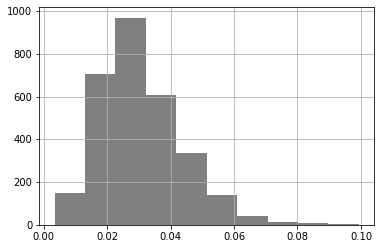

In [ ]:
#Distribution of Distance Measures
c['dist'].hist( facecolor='gray') 

In [ ]:
#Most common Pairing photos , thess could be representitive and replace cases that ( This can be our sample )
c['ref'].value_counts().head(100)

1379    4
1679    4
2448    4
2784    4
626     4
37      4
2585    4
1526    4
887     4
2657    4
2936    4
764     4
1130    4
168     4
1751    4
147     4
480     4
1764    4
679     4
667     4
55      3
2925    3
1711    3
1571    3
1019    3
1025    3
929     3
1968    3
518     3
1533    3
914     3
1978    3
393     3
882     3
595     3
528     3
1712    3
1723    3
710     3
2670    3
1581    3
1683    3
949     3
2751    3
698     3
1762    3
517     3
124     3
645     3
639     3
Name: ref, dtype: int64

In [ ]:
#Test out by showing all images that share a common ref 

#need the full link of image to display it 





## Color Invariance
Let's train again without color augmentation. This will force our model to 
respect the colors in the images.



In [ ]:
# Set color jitter and gray scale probability to 0
new_collate_fn = lightly.data.SimCLRCollateFunction(
    input_size=input_size,
    vf_prob=0.5,
    rr_prob=0.5,
    cj_prob=0.0,
    random_gray_scale=0.0
)

# let's update our collate method and reuse our dataloader
dataloader_train_simclr.collate_fn=new_collate_fn

# create a ResNet backbone and remove the classification head
resnet = torchvision.models.resnet18()
last_conv_channels = list(resnet.children())[-1].in_features
backbone = nn.Sequential(
    *list(resnet.children())[:-1],
    nn.Conv2d(last_conv_channels, num_ftrs, 1),
)
model = lightly.models.SimCLR(backbone, num_ftrs=num_ftrs)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
encoder = lightly.embedding.SelfSupervisedEmbedding(
    model,
    criterion,
    optimizer,
    dataloader_train_simclr
)

encoder.train_embedding(gpus=gpus,
                        progress_bar_refresh_rate=100,
                        max_epochs=max_epochs)
encoder = encoder.to(device)

embeddings, _, fnames = encoder.embed(dataloader_test, device=device)
embeddings = normalize(embeddings)

/usr/local/lib/python3.7/dist-packages/lightly/models/simclr.py:45: Warning: The high-level building block SimCLR will be deprecated in version 1.2.0. Use low-level building blocks instead. See https://docs.lightly.ai/lightly.models.html for more information
  PendingDeprecationWarning)
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:91: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=100)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
---

Training: 0it [00:00, ?it/s]

Compute efficiency: 0.99: 100%|██████████| 8/8 [00:16<00:00,  2.07s/it]


[100 135  97 143 125]


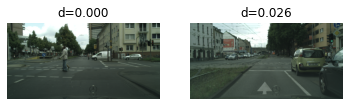

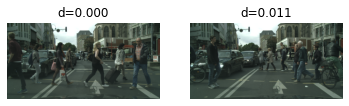

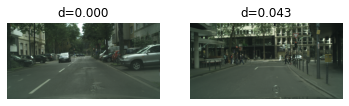

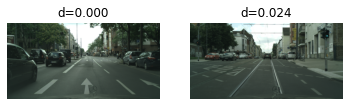

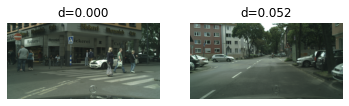

In [ ]:
plot_knn_examples(embeddings)

View embedings



In [ ]:
embeddings[0]

array([ 0.16714786, -0.00401818,  0.18589862, -0.07068113,  0.12745361,
        0.1629155 , -0.10077917,  0.192626  , -0.29477814, -0.338074  ,
        0.27957124,  0.1612281 ,  0.24231052, -0.16289087,  0.27766785,
        0.23181869, -0.18264562, -0.17377982,  0.20751405, -0.00992565,
       -0.0758939 , -0.0673366 , -0.13817878, -0.14825526,  0.02518548,
       -0.1686203 ,  0.02920556,  0.20680146, -0.14065476, -0.11301459,
       -0.08051878,  0.22627774], dtype=float32)

In [ ]:
#make these training embeddings 
embeddingsTrain=embeddings

# PCA

In [ ]:
#get label - before the dot , only the text part 
import pandas as pd
lab=pd.DataFrame(fnames, columns=['Label'])
lab.replace('\d+', '', regex=True, inplace=True)
lab['val']=lab.Label.astype("category").cat.codes
#a.value_counts()

In [ ]:
lab[lab.val==0].head(1)

,Label,val
0,cologne___leftImgbit.png,0


In [ ]:
import pandas as pd
df2=pd.DataFrame(embeddings)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0.167148,-0.004018,0.185899,-0.070681,0.127454,0.162915,-0.100779,0.192626,-0.294778,-0.338074,0.279571,0.161228,0.242311,-0.162891,0.277668,0.231819,-0.182646,-0.173780,0.207514,-0.009926,-0.075894,-0.067337,-0.138179,-0.148255,0.025185,-0.168620,0.029206,0.206801,-0.140655,-0.113015,-0.080519,0.226278
1,0.169202,-0.031131,0.153359,-0.066823,0.146193,0.155874,-0.096731,0.199018,-0.288540,-0.333645,0.280934,0.158269,0.231190,-0.153021,0.297581,0.259452,-0.176271,-0.168059,0.197163,-0.030164,-0.075816,-0.052239,-0.150415,-0.155993,0.018254,-0.187087,0.007068,0.196525,-0.133848,-0.122657,-0.080465,0.220286
2,0.170855,-0.019940,0.168266,-0.065856,0.136345,0.162815,-0.092748,0.195029,-0.292519,-0.334331,0.289451,0.154667,0.237997,-0.161803,0.287652,0.250413,-0.175593,-0.174591,0.204461,-0.015237,-0.076829,-0.058661,-0.149350,-0.139248,0.015900,-0.180950,0.014480,0.197550,-0.132717,-0.118084,-0.080428,0.219210
3,0.161498,-0.020264,0.172118,-0.070168,0.141748,0.157890,-0.095869,0.186243,-0.284432,-0.337101,0.282768,0.156917,0.233555,-0.163317,0.289469,0.248672,-0.177397,-0.176045,0.207757,-0.002012,-0.082385,-0.064964,-0.145201,-0.130561,0.012302,-0.186846,0.029104,0.208430,-0.133232,-0.119509,-0.082375,0.226171
4,0.174808,-0.023430,0.150540,-0.069029,0.151978,0.165890,-0.090297,0.200097,-0.287511,-0.326958,0.283694,0.161694,0.227925,-0.167919,0.288268,0.248492,-0.168718,-0.161653,0.206030,-0.029626,-0.067489,-0.058890,-0.153308,-0.156330,0.018517,-0.184762,0.010670,0.199518,-0.134306,-0.129134,-0.080582,0.227982


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA()
x = StandardScaler().fit_transform(df2)
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
dff=x_pca.iloc[ :  , 0:2]  ##only first 2 components -What is the impact of just these two only 
result2 = pd.concat([dff, a], axis=1)
result2.columns = ['a', 'b','label','c']
result2.head(2)

,a,b,label,c
0,-4.140759,1.223140,0,113
1,0.404240,-1.970617,1,86


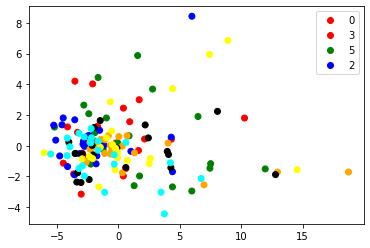

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x = result2['a']
y = result2['b']
classes = ['0','3','5','2']
#classes = ['Cloudy', ,'Shine' ,'Sunrise', 'Rainy','x','y','z']
values = result2['label']
colours = ListedColormap(['red', 'green', 'blue','orange','black','yellow' ,'cyan'])
scatter = plt.scatter(x, y,c=values, cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

Load Model and New File 

Make sure you place the `model.pth` file in the same folder as this code



# Load Test set - OUT OF SAMPLE  (new cases)

Fetch test photos and score with the Unsupervised model 

In [ ]:
#from google.colab import files
#uploaded = files.upload()


In [ ]:
!google-drive-ocamlfuse -cc

/bin/bash: google-drive-ocamlfuse: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
path_to_data2 = 'testing/image_2'

In [ ]:
dataset_test = lightly.data.LightlyDataset(
    input_dir= path_to_data2,     
    transform=test_transforms
)

In [ ]:
dataloader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

In [ ]:
embeddings = []
filenames = []

# disable gradients for faster calculations
model.eval()
with torch.no_grad():
    for i, (x, _, fnames) in enumerate(dataloader_test):
        # move the images to the gpu
        x = x.to(device)
        # embed the images with the pre-trained backbone
        y = model.backbone(x)
        y = y.squeeze()
        # store the embeddings and filenames in lists
        embeddings.append(y)
        filenames = filenames + list(fnames)
        

# concatenate the embeddings and convert to numpy
embeddings = torch.cat(embeddings, dim=0)
embeddings = embeddings.cpu().numpy()

In [ ]:
len(embeddings)

200

In [ ]:
embeddings, _, fnames = encoder.embed(dataloader_test, device=device)
embeddingsTest = normalize(embeddings)

Compute efficiency: 0.99: 100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


[ 65  98 146  25 135]


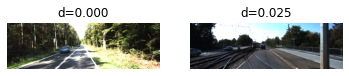

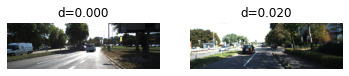

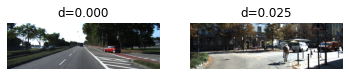

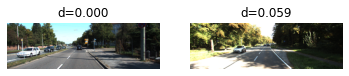

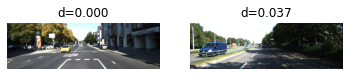

In [ ]:
plot_knn_examples(embeddingsTest)